## Characteristics Model Performance

In [13]:
name = "characteristic_googlenet_25"

scores, y_pred, y_true, y_labels = load_raw_eval_data(name)

ps = {}
ps_ed = {}
for p in range(0, 100):
    p = p / 100
    ps[p] = []
    ps_ed[p] = 0
    for i in range(len(y_labels)):
        t = y_labels[i]
        tau_hat = species_from_feats(y_pred[i], p)
        ps[p].append(performance(tau_hat, t))

        real_ed = get_edibility(t)
        pred_ed = np.argmax(np.bincount(tau_hat)) if len(tau_hat) > 0 else -1
        ps_ed[p] += 1 if real_ed == pred_ed else 0

    ps[p] = np.mean(ps[p])
    ps_ed[p] = ps_ed[p]/len(y_labels)

keys = np.array(list(ps.keys()))
values = np.array(list(ps.values()))
save_performance_data(keys, values, name)

ed_keys = np.array(list(ps_ed.keys()))
ed_values = np.array(list(ps_ed.values()))
save_performance_data(ed_keys, ed_values, name+"_ed", edibility=True)

In [17]:
name = "direct"
name = "characteristic_googlenet_25"
compute_and_save_performance(name)

IndexError: tuple index out of range

## Direct Model Performance

In [4]:
name = "direct"

scores, y_pred, y_true, y_labels = load_raw_eval_data(name)

ps = {}
ps_ed = {}
for p in range(0, 100):
    p = p / 100
    ps[p] = []
    ps_ed[p] = 0
    for i in range(len(y_labels)):
        t = y_labels[i]
        i_scores = list(enumerate(scores[i]))
        sorted_scores = sorted(i_scores, key=lambda x:x[1], reverse=True)
        size_of_tau_hat = len(lookalikes(sorted_scores[0][0], p))
        tau_hat = [idx for (idx, val) in sorted_scores[:size_of_tau_hat]]
        ps[p].append(performance(tau_hat, t))

        real_ed = get_edibility(t)
        pred_ed = np.argmax(np.bincount(tau_hat)) if len(tau_hat) > 0 else -1
        ps_ed[p] += 1 if real_ed == pred_ed else 0

    ps[p] = np.mean(ps[p])
    ps_ed[p] = ps_ed[p]/len(y_labels)

keys = np.array(list(ps.keys()))
values = np.array(list(ps.values()))
save_performance_data(keys, values, name)

ed_keys = np.array(list(ps_ed.keys()))
ed_values = np.array(list(ps_ed.values()))
save_performance_data(ed_keys, ed_values, name+'_ed', edibility=True)

True

In [7]:
from data_utils import load_bolete_data
import matplotlib.pyplot as plt
data = load_bolete_data()

ItemsViewHDF5(<HDF5 file "bolete.h5" (mode r)>)


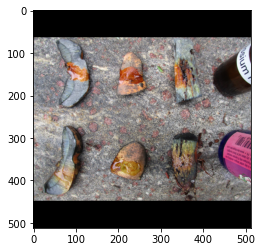

In [8]:
plt.imshow(data["bolete-images"].T[0])

In [1]:
import os
from performance import compute_and_save_performance
suffix = "_true.csv"
for entry in os.listdir("evaluation_data"):
    if suffix in entry:
        name = entry[:-len(suffix)]
        print(name)
        compute_and_save_performance(name)

characteristic_bolete.h5
direct_bolete_lowres.h5
direct_bolete.h5
characteristic_bolete_lowres.h5
direct_ed_bolete_lowres.h5
direct_ed_bolete.h5
